In [1]:
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Task : 

Implementing ML models to detect anamolies in the data. 

# Overview Data

In [2]:
df = pd.read_excel("AllBirdsv4.xlsx")

In [3]:
location = pd.read_csv("Test Birds Location.csv")

In [4]:
#replace an organize values
try:
    df.Y = df.Y.replace({"54?":54,"68?":68})
except TypeError:
    pass

In [5]:
df.sample(3)

File ID                English_name Vocalization_type Quality      Time  \
1612   311384                  Queenscoat              call       A  10:30:00   
1601   389929                  Queenscoat              call       A  12:05:00   
901    388119  Green-tipped Scarlet Pipit              song       B  08:30:00   

                     Date   X    Y  
1612            3/24/2016  43  159  
1601           10/14/2017  65  101  
901   2017-10-09 00:00:00  81  147

In [6]:
df.shape
# df contains 2081 rows and 8 columns

(2081, 8)

In [7]:
df.isna().sum()
# yep is not contain NaN values

File ID              0
English_name         0
Vocalization_type    0
Quality              0
Time                 0
Date                 0
X                    0
Y                    0
dtype: int64

In [8]:
# find unique labeling values in English_name, Vocalization_type, and Quality
print(df.English_name.unique(),'\n\n', df.Vocalization_type.unique(),'\n\n' , df.Quality.unique())

['Rose-crested Blue Pipit' 'Blue-collared Zipper' 'Bombadil'
 'Broad-winged Jojo' 'Canadian Cootamum' 'Carries Champagne Pipit'
 'Darkwing Sparrow' 'Eastern Corn Skeet' 'Green-tipped Scarlet Pipit'
 'Lesser Birchbeere' 'Orange Pine Plover' 'Ordinary Snape' 'Pinkfinch'
 'Purple Tooting Tout' 'Qax' 'Queenscoat' 'Bent-beak Riffraff'
 'Scrawny Jay' 'Vermillion Trillian'] 

 ['call' 'song' 'Song' 'call, song' '?' 'Call' 'Call, song' ' call' 'scold'
 'drumming' 'bill-snapping'] 

 ['no score' 'A' 'B' 'C' 'D' 'E']


# Experimental Step 

In [9]:
Blue = df.loc[df.English_name == "Rose-crested Blue Pipit"]
# replace value (feature engineering)
Blue.Vocalization_type = Blue.Vocalization_type.replace({"Song":"song"})
Blue.Quality = Blue.Quality.replace({"no score":0})

In [10]:
Blue.sample(3)

File ID             English_name Vocalization_type Quality      Time  \
3    405548  Rose-crested Blue Pipit              song       A  11:00:00   
92   306344  Rose-crested Blue Pipit              song       B  19:00:00   
84   339832  Rose-crested Blue Pipit              call       B  12:30:00   

                   Date    X    Y  
3   2018-10-03 00:00:00   55  125  
92  2016-06-03 00:00:00  159  129  
84           10/23/2016  149  111

In [11]:
def pipit(audio):
    return Blue.loc[Blue.Vocalization_type == audio]["X"], Blue.loc[Blue.Vocalization_type == audio]["Y"]
def pipit_(Q):
    return Blue.loc[Blue.Quality == Q]["X"], Blue.loc[Blue.Quality == Q]["Y"]

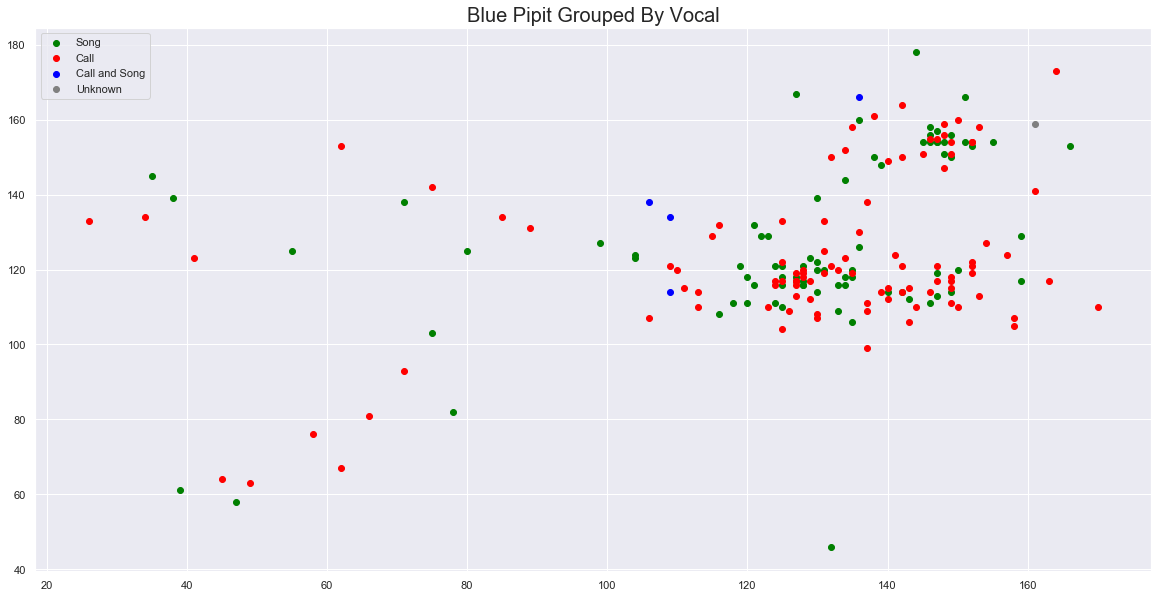

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(pipit("song")[0], pipit("song")[1], color="green", label="Song")
plt.scatter(pipit("call")[0], pipit("call")[1], color="red", label="Call")
plt.scatter(pipit('call, song')[0], pipit('call, song')[1], color="blue", label="Call and Song")
plt.scatter(pipit("?")[0], pipit("?")[1], color="gray", label="Unknown")
plt.legend(loc="best")
plt.title("Blue Pipit Grouped By Vocal", fontsize=20)
plt.show()

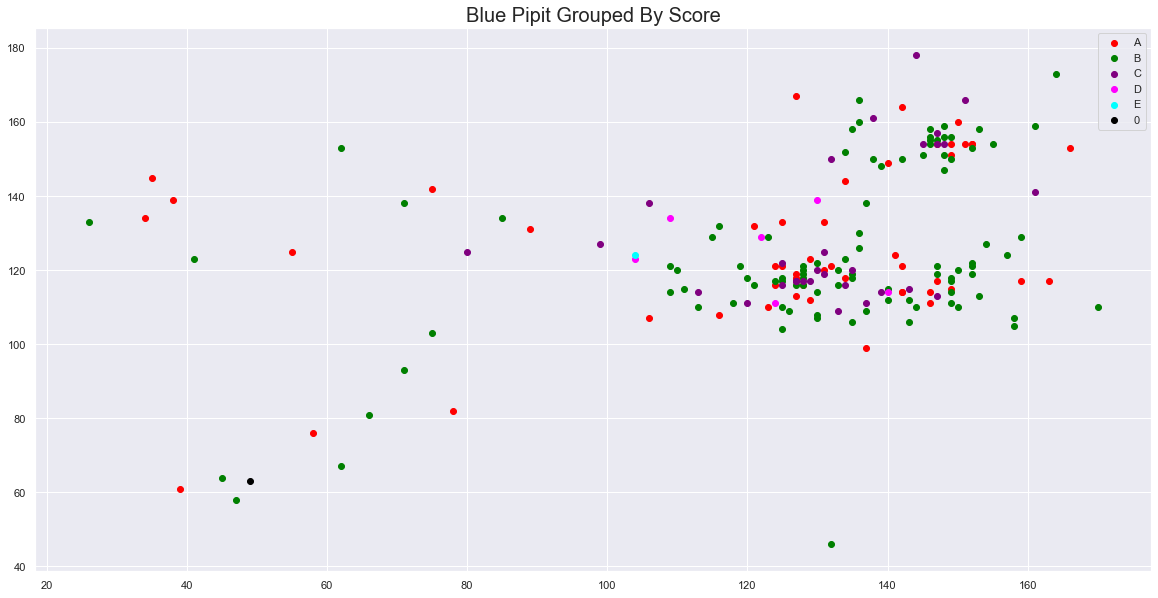

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(pipit_("A")[0], pipit_("A")[1], color="red", label="A")
plt.scatter(pipit_("B")[0], pipit_("B")[1], color="green", label="B")
plt.scatter(pipit_("C")[0], pipit_("C")[1], color="purple", label="C")
plt.scatter(pipit_("D")[0], pipit_("D")[1], color="magenta", label="D")
plt.scatter(pipit_("E")[0], pipit_("E")[1], color="aqua", label="E")
plt.scatter(pipit_(0)[0], pipit_(0)[1], color="black", label="0")
plt.legend(loc="best")
plt.title("Blue Pipit Grouped By Score", fontsize=20)
plt.show()

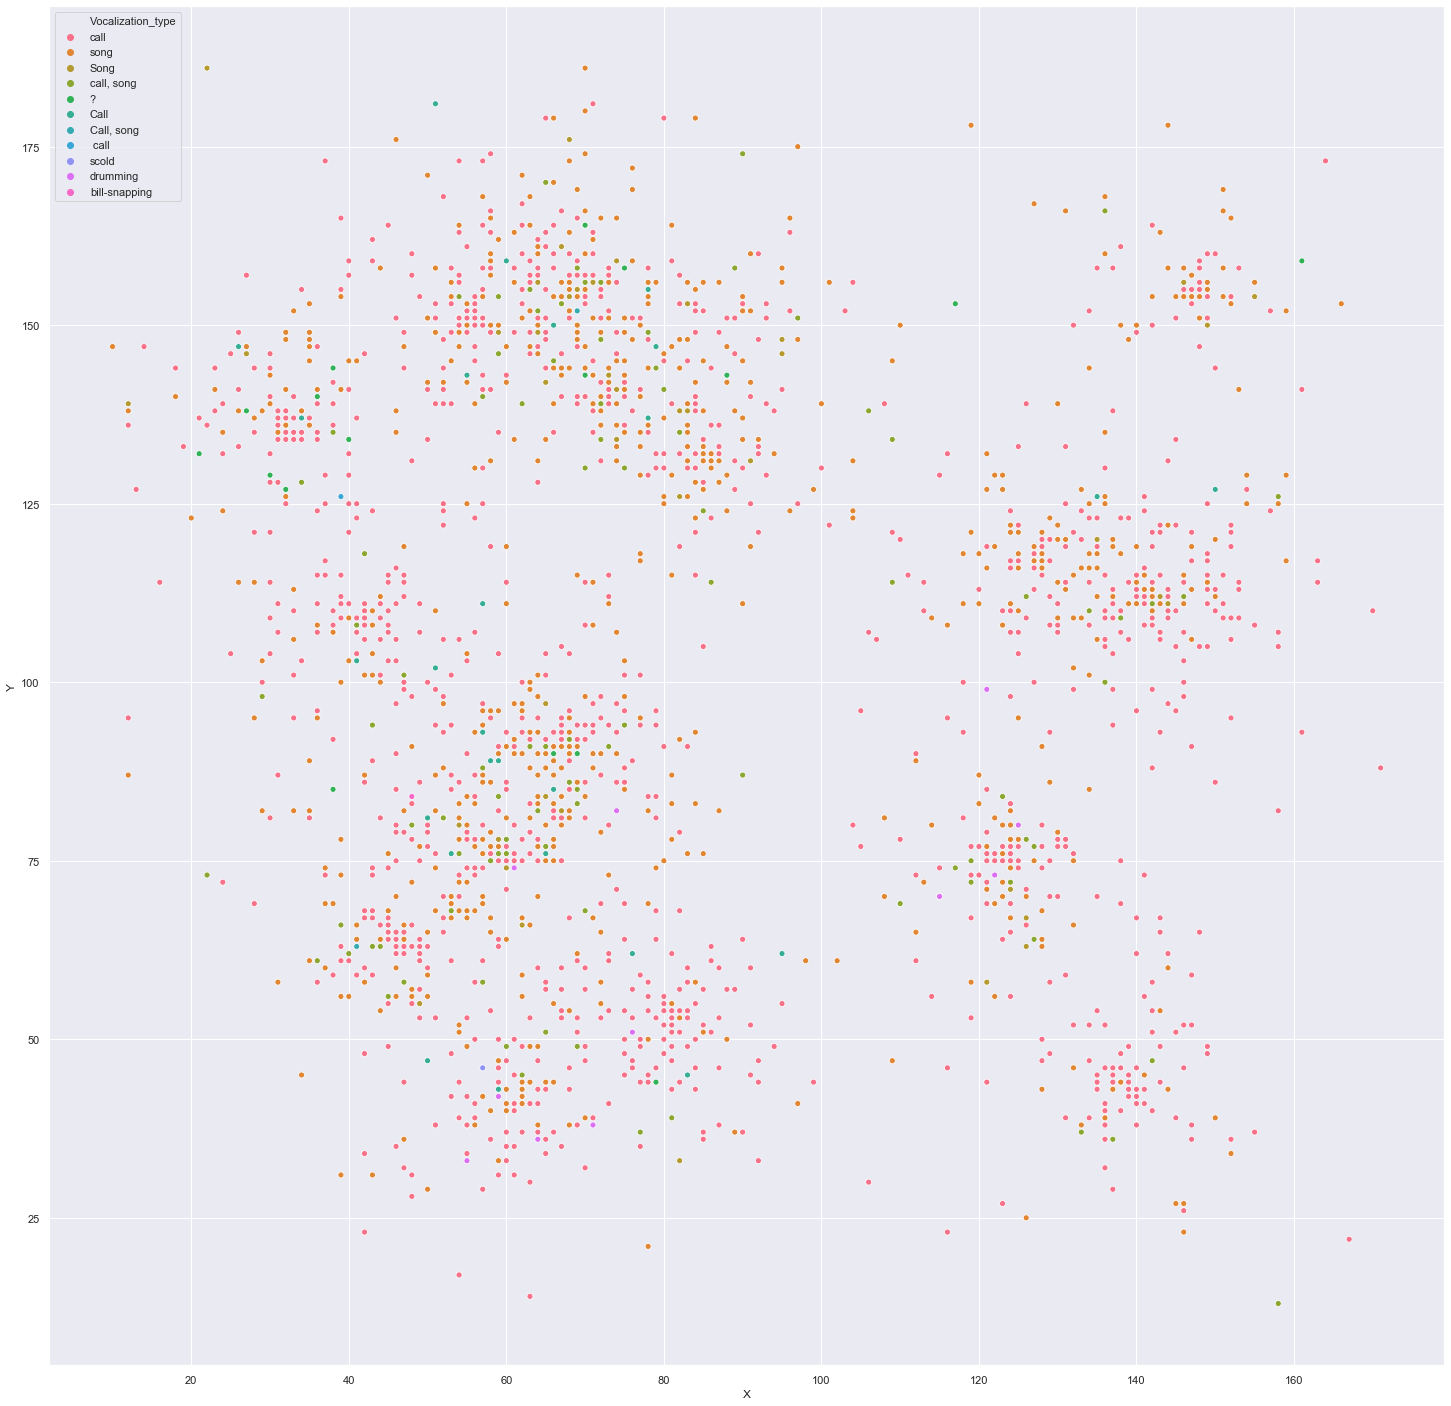

In [14]:
plt.figure(figsize=(25,25))
sns.scatterplot("X", "Y", hue = "Vocalization_type", data = df)
plt.show()

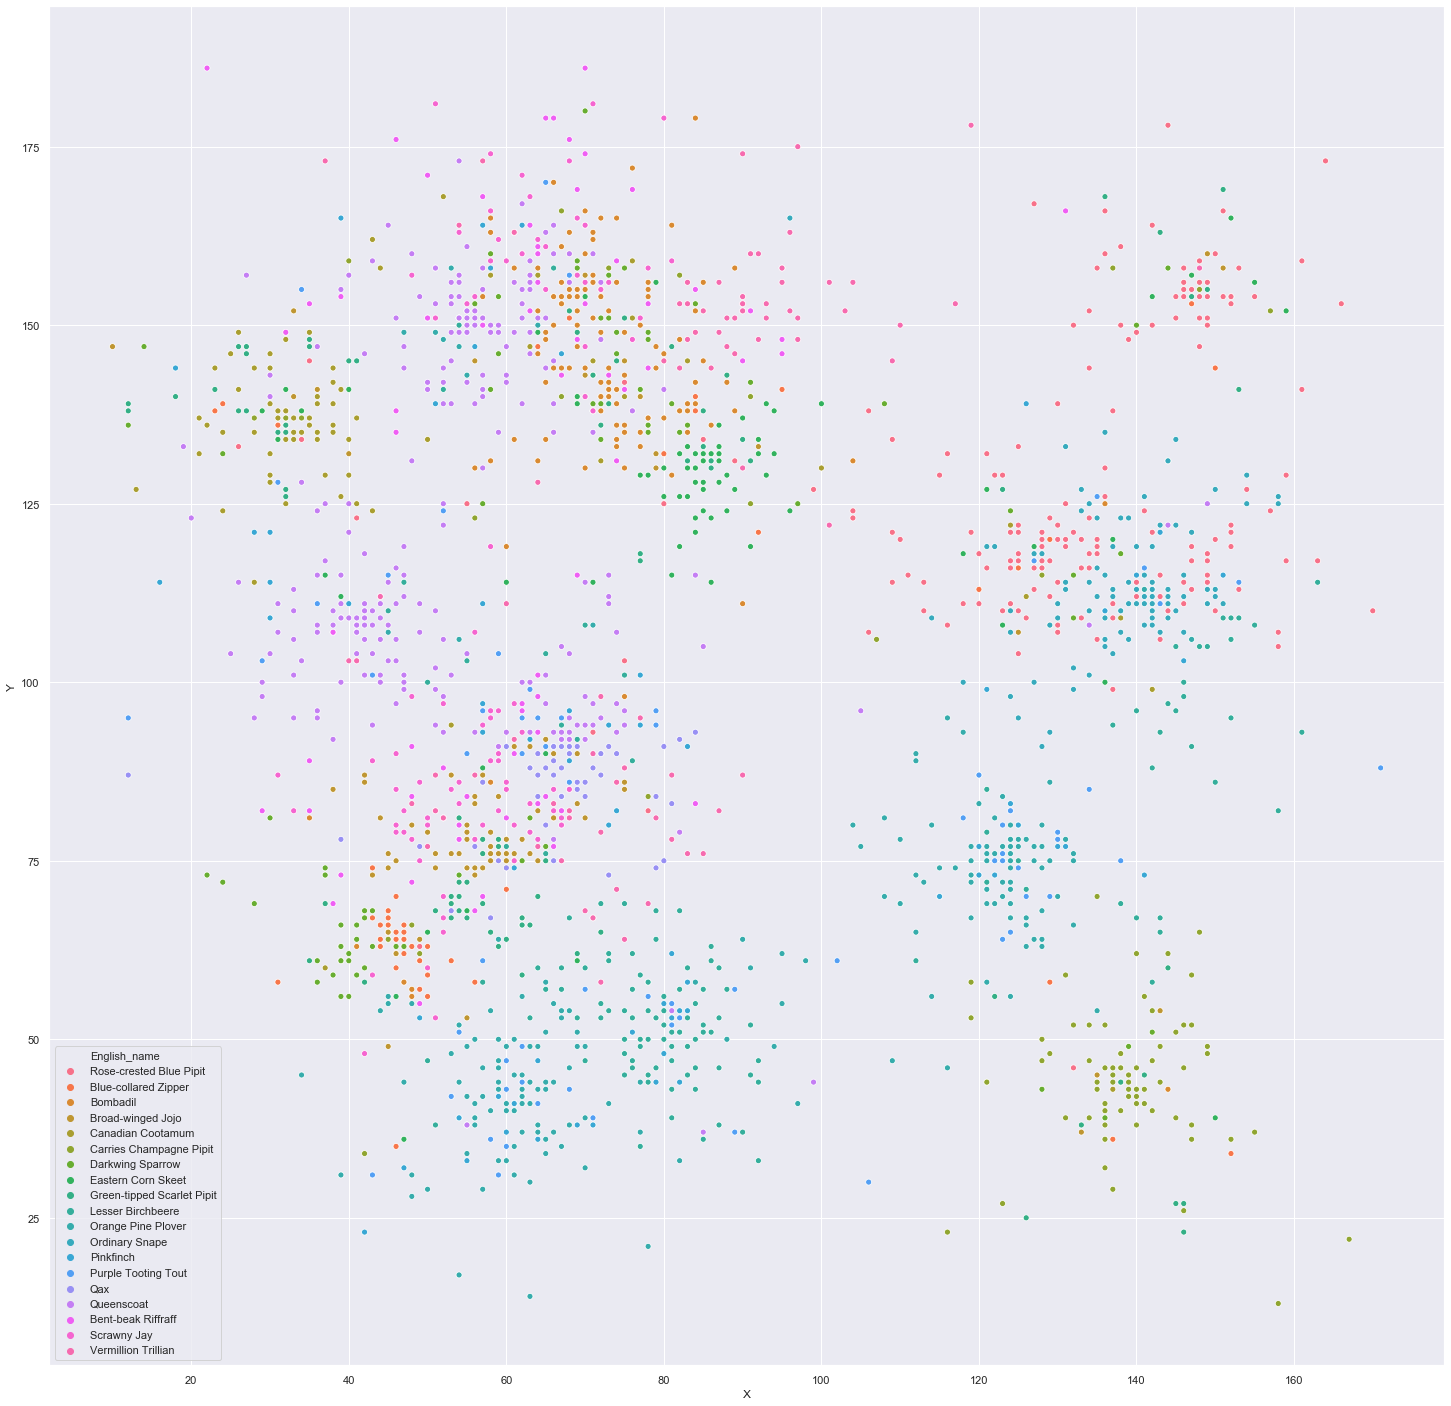

In [15]:
plt.figure(figsize=(25,25))
sns.scatterplot("X", "Y", hue = "English_name", data = df)
plt.show()

In [16]:
# Load Library for EDA Audio Datasets
import os
from os import listdir
from os.path import join
from tqdm import tqdm

import IPython.display as ipd
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim
import librosa.display
import librosa

In [17]:
# external function 
def text(x):
    label = []
    for y in x.split("-") :
        if "." in y:
            pass #print(y.split(".")[0]) # this is numeric
        else:
            label.append(y)
    return " ".join(label)

In [21]:
# load audio files
files = r'E:\ALL BIRDS\\'.replace("\\","/")

Id, value, Sr, Name, Filename = [],[],[],[],[]

for x in tqdm(listdir(files)):
    Id.append(x.split("-")[-1].split(".")[0])
    rate, sr = librosa.load(files+x)
    value.append(rate)
    Sr.append(sr)
    Name.append(text(x))
    Filename.append(files+x)

100%|██████████| 2080/2080 [1:09:21<00:00,  1.92s/it]    


In [22]:
data = pd.DataFrame({"ID":Id, 
                     "Value":value,
                     "Sr":Sr,
                     "Name":Name,
                     "Filename":Filename})

In [23]:
data.head()

ID                                              Value     Sr  \
0  103177  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  22050   
1  103178  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  22050   
2  103181  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  22050   
3  106265  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  22050   
4  112603  [-0.047751535, -0.06848076, -0.058126334, -0.0...  22050   

                 Name                                     Filename  
0  Bent Beak Riffraff  E:/ALL BIRDS//Bent-Beak-Riffraff-103177.mp3  
1  Bent Beak Riffraff  E:/ALL BIRDS//Bent-Beak-Riffraff-103178.mp3  
2  Bent Beak Riffraff  E:/ALL BIRDS//Bent-Beak-Riffraff-103181.mp3  
3  Bent Beak Riffraff  E:/ALL BIRDS//Bent-Beak-Riffraff-106265.mp3  
4  Bent Beak Riffraff  E:/ALL BIRDS//Bent-Beak-Riffraff-112603.mp3

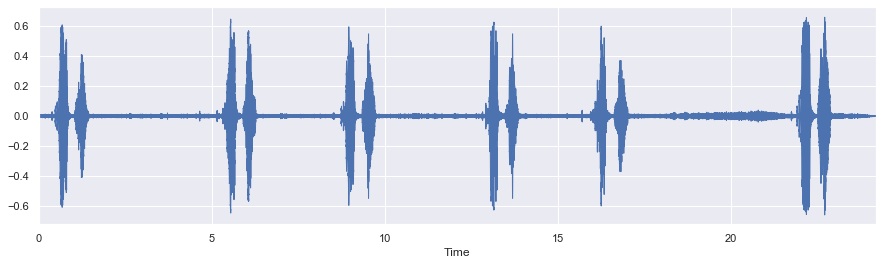

In [24]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(data.Filename.values[0])
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

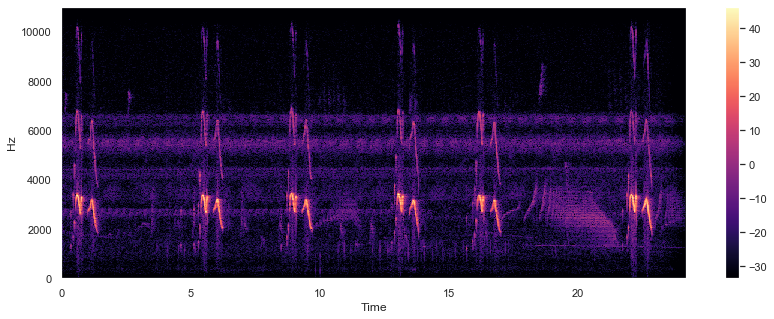

In [25]:
X = librosa.stft(data.Value.values[0])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

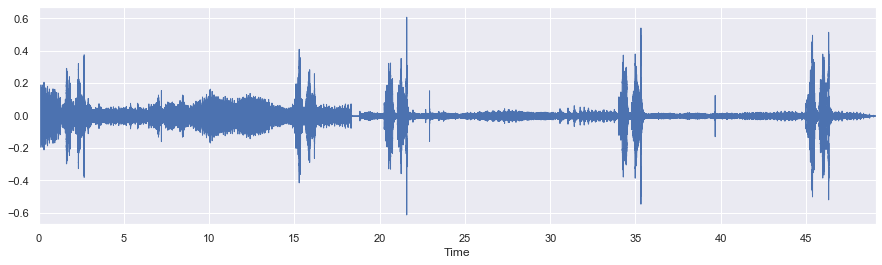

In [26]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(data.Filename.values[1])
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

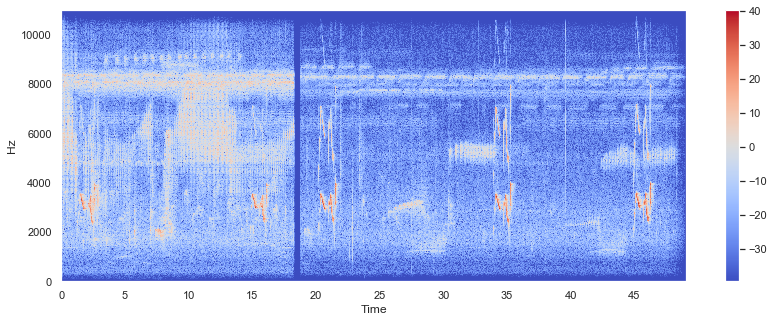

In [27]:
X = librosa.stft(data.Value.values[1])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

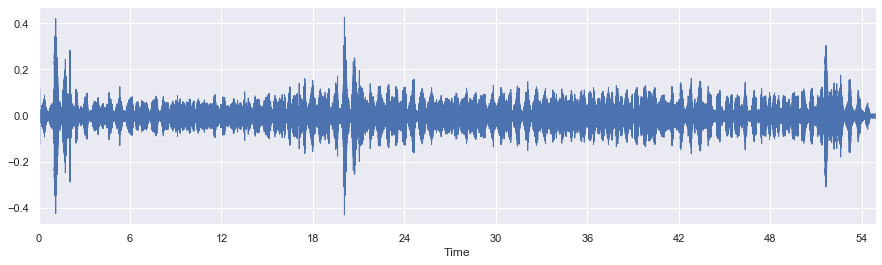

In [28]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(data.Filename.values[2])
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

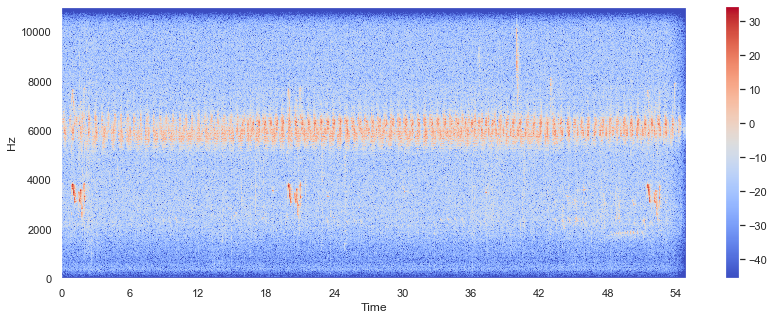

In [29]:
X = librosa.stft(data.Value.values[2])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

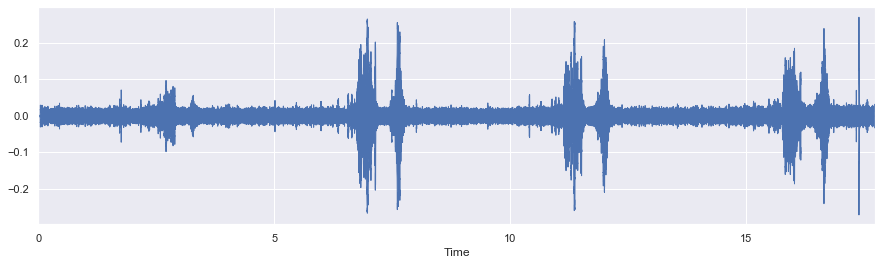

In [30]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(data.Filename.values[3])
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

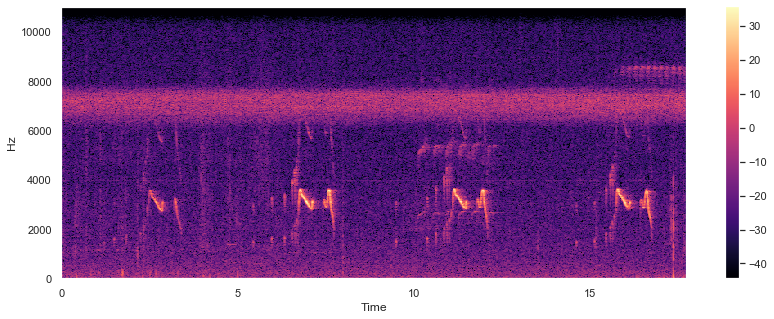

In [31]:
X = librosa.stft(data.Value.values[3])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

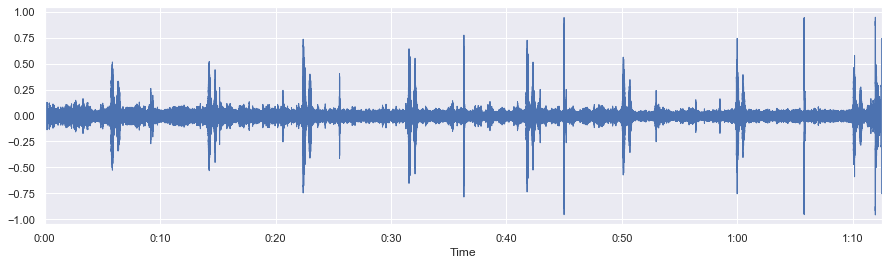

In [32]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(data.Filename.values[4])
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

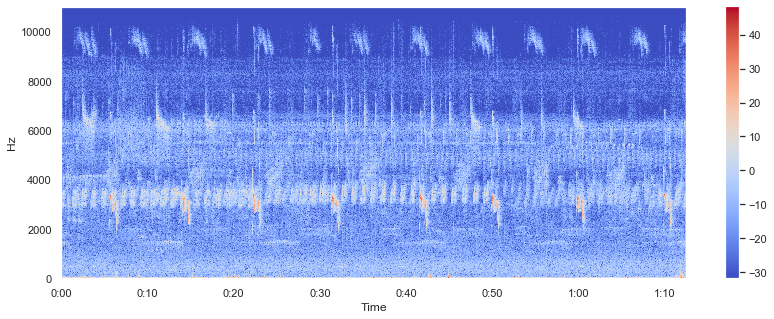

In [33]:
X = librosa.stft(data.Value.values[4])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Spectral Centroid

In [34]:
import sklearn

In [35]:
spectral_centroids = librosa.feature.spectral_centroid(data1,sample_rate1)[0]
spectral_centroids.shape

(3122,)

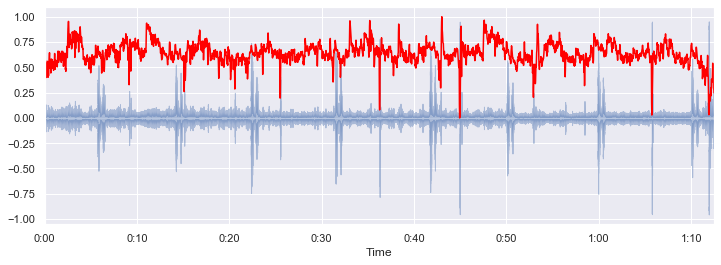

In [36]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data1, sr=sample_rate1, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='red')
plt.show()

# Spectral Rollof

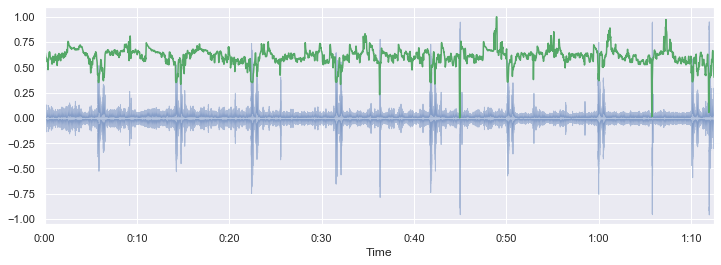

In [37]:
spectral_rolloff = librosa.feature.spectral_rolloff(data1+0.01, sr=sample_rate1)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data1, sr=sample_rate1, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')

# Spectral Bandwidth

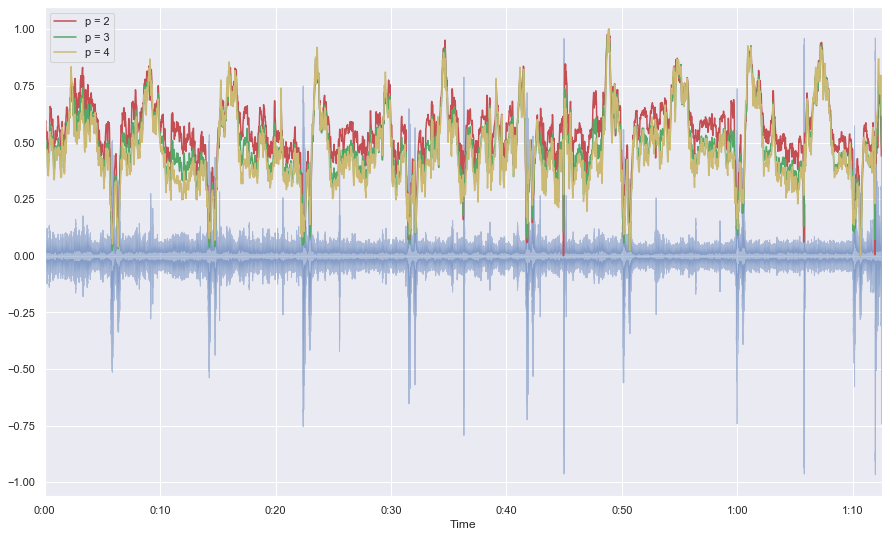

In [38]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data1+0.01, sr=sample_rate1)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data1+0.01, sr=sample_rate1, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data1+0.01, sr=sample_rate1, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data1+0.01, sr=sample_rate1, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

# Zero Crossing Rate

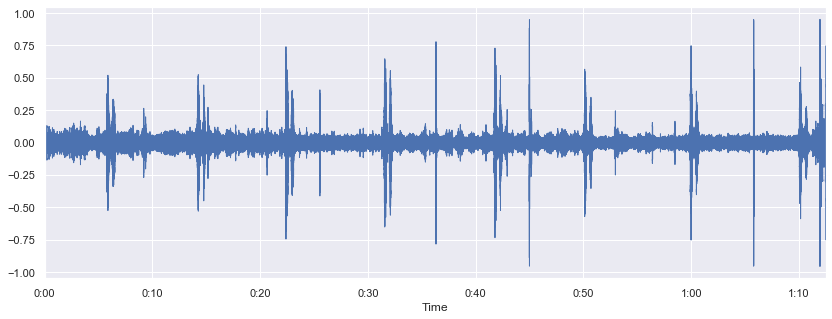

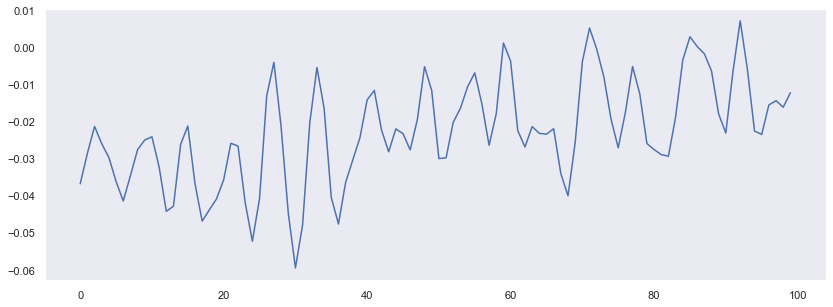

In [39]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data1, sr=sample_rate1)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data1[n0:n1])
plt.grid()

In [40]:
zero_crossings = librosa.zero_crossings(data1[n0:n1], pad=False)
print(sum(zero_crossings))#16

8


# Mel-Frequency Cepstral Coefficients(MFCCs)

In [41]:
mfccs = librosa.feature.mfcc(data1, sr=sample_rate1)
mfccs.shape

(20, 3122)

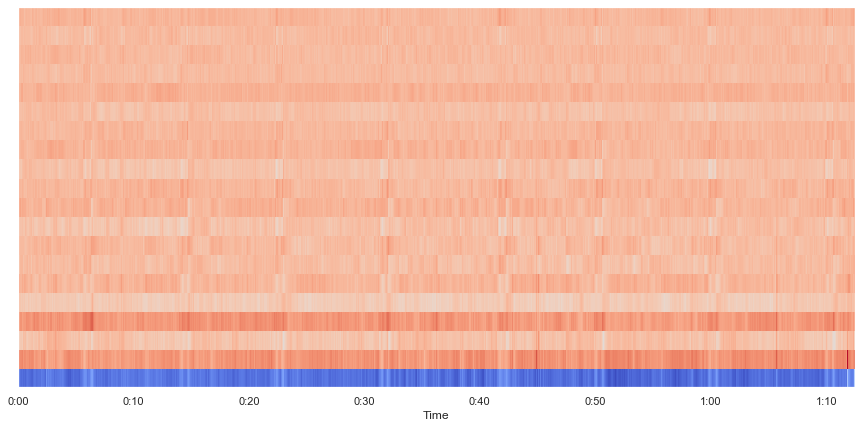

In [42]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate1, x_axis='time')

# Chroma Feature

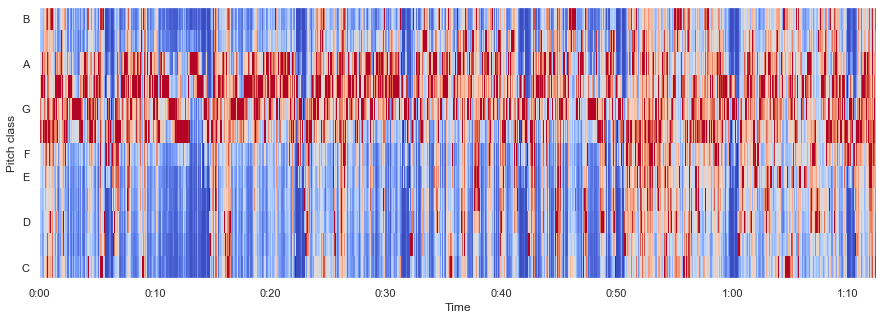

In [43]:
chromagram = librosa.feature.chroma_stft(data1, sr=sample_rate1)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Preparation

In [44]:
# Step-steps is => preparing data => feature engineering => do some simple ML methode (using sklearn) 
# if accuracy is 75% above, i think is enough... 
# else, ill do some deep learning methode i think ANN would be greate!

In [45]:
# replace column ID
df.columns = ["ID", 'English_name', 'Vocalization_type', 'Quality', 'Time', 'Date', 'X', 'Y']
# convert obj to int
data.ID = data.ID.astype(np.int64)

In [46]:
data_ready = pd.merge(df, data, on="ID")

In [47]:
# because i see there's noise values in vocalization... i want to replace an unorderer values to normal one
data_ready.Vocalization_type = data_ready.Vocalization_type.replace({"Call":"call",
                                                                     "Call, song":"call, song",
                                                                     " call":"call"}) 

In [48]:
# we need to label 1 for blue pipit, else 0... than make some model base that classifier... is score is 75%++ 
# using simple sklearn, please try to get more with xgboost... my max score is 90%... if its clear
# test it with Test Birds from Kasios with labeling 1 for True, else 0 => False...
# Visualisation and create external img... 

# Feature Engineering

In [49]:
# create label 
def label_blue(x):
    if x == "Rose-crested Blue Pipit":
        return 1
    else: 
        return 0

In [50]:
# implementation for labeling, 1 = True, 0 = False
data_ready["Label"] = [label_blue(x) for x in data_ready.English_name]

In [51]:
data_ready.sample(1)

ID             English_name Vocalization_type Quality      Time  \
25  164204  Rose-crested Blue Pipit              song       A  06:00:00   

         Date    X    Y                                              Value  \
25  4/30/2012  151  154  [-3.1073369e-06, 5.797005e-06, -2.1102136e-05,...   

       Sr                     Name  \
25  22050  Rose Crested Blue Pipit   

                                            Filename  Label  
25  E:/ALL BIRDS//Rose-Crested-Blue-Pipit-164204.mp3      1

In [52]:
# make new df for modeling ML
df_train = data_ready[['English_name', 'Name',"Vocalization_type", 'Quality', 'X', 'Y', 'Value', 'Label']]

In [53]:
# Change Values Vocalization to Numeric
df_train.Vocalization_type = df_train.Vocalization_type.replace({'call':1, 
                                                                 'song':2, 
                                                                 'Song':2, 
                                                                 'call, song':3, 
                                                                 '?':0, 
                                                                 'scold':4, 
                                                                 'drumming':5,
                                                                 'bill-snapping':6}) 
# Change Values Quality to Numeric
df_train.Quality = df_train.Quality.replace({'no score':0, 
                                             'A':5, 
                                             'B':4, 
                                             'C':3, 
                                             'D':2, 
                                             'E':1})
# Change Values Name of Bird to Numeric
df_train.English_name = df_train.English_name.replace({'Rose-crested Blue Pipit':1, 
                                                       'Blue-collared Zipper':2, 
                                                       'Bombadil':3,
                                                       'Broad-winged Jojo':4, 'Canadian Cootamum':5,
                                                       'Carries Champagne Pipit':6, 'Darkwing Sparrow':7,
                                                       'Eastern Corn Skeet':8, 'Green-tipped Scarlet Pipit':9,
                                                       'Lesser Birchbeere':10, 'Orange Pine Plover':11, 'Ordinary Snape':12,
                                                       'Pinkfinch':13, 'Purple Tooting Tout':14, 'Qax':15, 'Queenscoat':16,
                                                       'Bent-beak Riffraff':17, 'Scrawny Jay':18, 'Vermillion Trillian':19})
# Change Values Name of Bird to Numeric
df_train.Name = df_train.Name.replace({'Rose Crested Blue Pipit':1, 
                                       'Blue collared Zipper':2, 
                                       'Bombadil':3,
                                       'Broad winged Jojo':4, 'Canadian Cootamum':5,
                                       'Carries Champagne Pipit':6, 'Darkwing Sparrow':7,
                                       'Eastern Corn Skeet':8, 'Green Tipped Scarlet Pipit':9,
                                       'Lesser Birchbeere':10, 'Orange Pine Plover':11, 'Ordinary Snape':12,
                                       'Pinkfinch':13, 'Purple Tooting Tout':14, 'Qax':15, 'Queenscoat':16,
                                       'Bent Beak Riffraff':17, 'Scrawny Jay':18, 'Vermillion Trillian':19})
# Sum of Value
df_train["Sum"] = [sum(x) for x in tqdm(df_train.Value)]

100%|██████████| 2080/2080 [07:49<00:00,  7.31it/s]


In [54]:
df_train.sample(3)

English_name  Name  Vocalization_type  Quality   X    Y  \
1900            17    17                  6        3  48   84   
1969            18    18                  2        4  68  173   
485              4     4                  2        2  57   87   

                                                  Value  Label        Sum  
1900  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0  -4.840313  
1969  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0   0.021928  
485   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0  13.563176

# Try Other Methods

In [55]:
df_train.sample(1)

English_name  Name  Vocalization_type  Quality   X    Y  \
828             8     8                  2        3  83  133   

                                                 Value  Label         Sum  
828  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0 -681.892642

# Feature Engineering

In [56]:
rmse, chroma_stft, spec_cent, spec_bw, rolloff, zcr = [], [], [], [], [], []
sr = 22050
for y in tqdm(df_train.Value) :
    rmse.append(np.mean(librosa.feature.rms(y=y)))
    chroma_stft.append(np.mean(librosa.feature.chroma_stft(y=y, sr=sr)))
    spec_cent.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
    spec_bw.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))
    rolloff.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)))
    zcr.append(np.mean(librosa.feature.zero_crossing_rate(y)))

100%|██████████| 2080/2080 [28:02<00:00,  2.76it/s]  


In [57]:
# adding some features base value
df_train["RMS"] = rmse
df_train["CHROMA"] = chroma_stft
df_train["CENT"] = spec_cent 
df_train["BW"] = spec_bw
df_train["ROLL_OFF"] = rolloff
df_train["ZCR"] = zcr

In [58]:
df_train.head(1)

English_name  Name  Vocalization_type  Quality   X   Y  \
0             1     1                  1        0  49  63   

                                               Value  Label       Sum  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1  0.850095   

        RMS    CHROMA         CENT           BW     ROLL_OFF       ZCR  
0  0.035429  0.667863  3569.648353  2678.205496  6655.764581  0.264584

# Preparation Data

In [59]:
X = df_train[['RMS', 'CHROMA', 'CENT', 'BW', 'ROLL_OFF','ZCR']].values
Y = df_train.Label.values

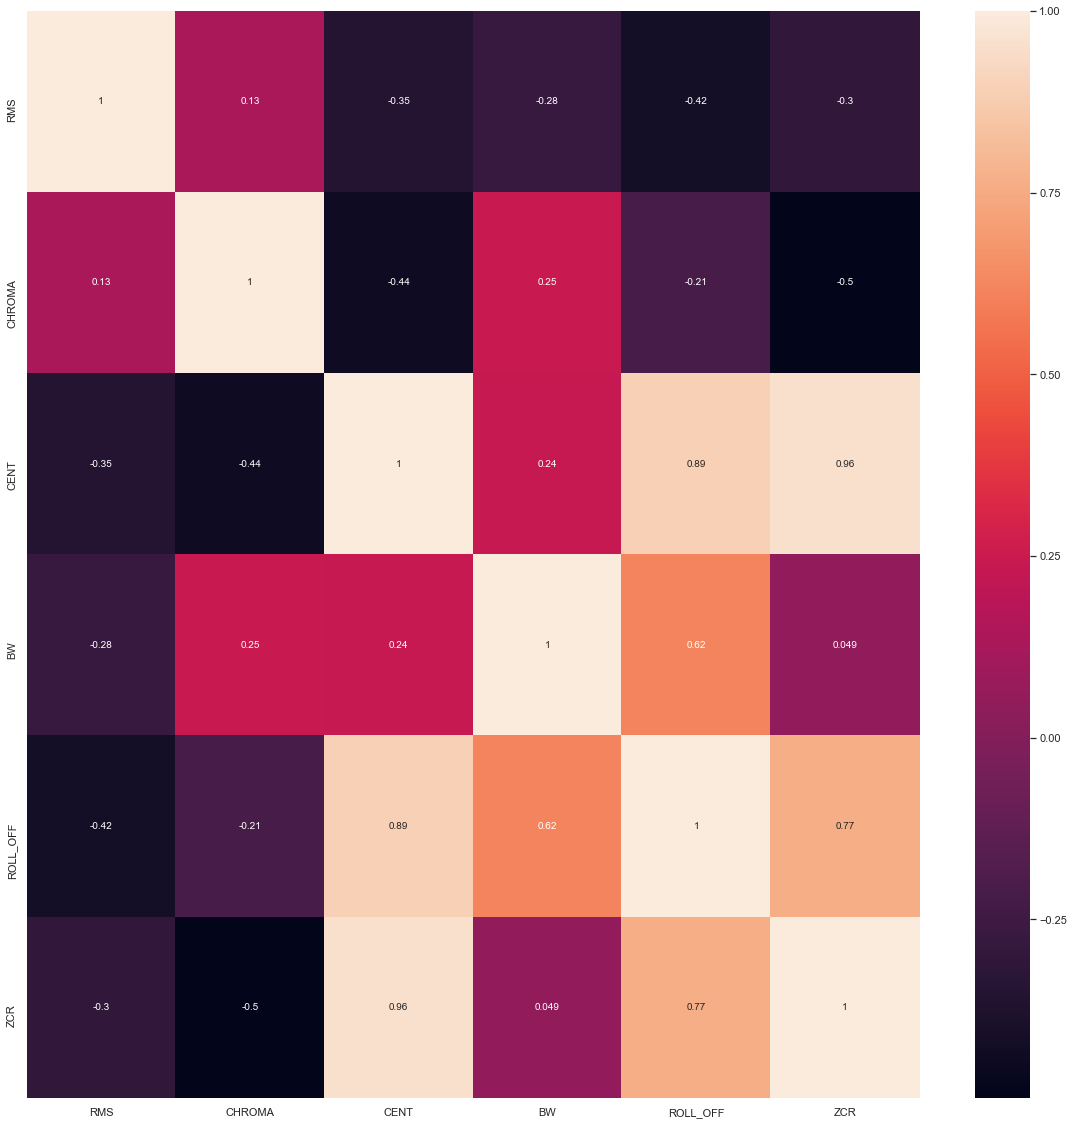

In [60]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_train[['RMS', 'CHROMA', 'CENT', 'BW', 'ROLL_OFF','ZCR']].corr(), annot=True)
plt.show()

# Modeling

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# split datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Decision Tree

In [63]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [64]:
y_pred = clf.predict(X_test)

In [65]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[414  66]
 [ 30  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       480
           1       0.13      0.25      0.17        40

    accuracy                           0.82       520
   macro avg       0.53      0.56      0.53       520
weighted avg       0.87      0.82      0.84       520

Accuracy: 0.8153846153846154


# KNN

In [66]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=8)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[478   2]
 [ 39   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       480
           1       0.33      0.03      0.05        40

    accuracy                           0.92       520
   macro avg       0.63      0.51      0.50       520
weighted avg       0.88      0.92      0.89       520

Accuracy: 0.9211538461538461


# GNB

In [69]:
gnb = GaussianNB()

In [70]:
model = gnb.fit(X_train, y_train)

In [71]:
preds = gnb.predict(X_test)

In [72]:
result = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, preds)
print("Accuracy:",result2)

Confusion Matrix:
[[480   0]
 [ 40   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       480
           1       0.00      0.00      0.00        40

    accuracy                           0.92       520
   macro avg       0.46      0.50      0.48       520
weighted avg       0.85      0.92      0.89       520

Accuracy: 0.9230769230769231


# SVM

In [73]:
from sklearn.svm import SVC # "Support vector classifier"
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [74]:
preds = model_svc.predict(X_test)

In [75]:
result = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, preds)
print("Accuracy:",result2)

Confusion Matrix:
[[480   0]
 [ 40   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       480
           1       0.00      0.00      0.00        40

    accuracy                           0.92       520
   macro avg       0.46      0.50      0.48       520
weighted avg       0.85      0.92      0.89       520

Accuracy: 0.9230769230769231


# Make Test Dataset !

In [77]:
a,b,c,d,e,g = [],[],[],[],[],[]
sr = 22050
f = r"E:/Test Birds from Kasios/"
for x in tqdm(os.listdir(r"E:/Test Birds from Kasios/")) :
    y, sr = librosa.load(f+x)
    a.append(np.mean(librosa.feature.rms(y=y)))
    b.append(np.mean(librosa.feature.chroma_stft(y=y, sr=sr)))
    c.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
    d.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))
    e.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)))
    g.append(np.mean(librosa.feature.zero_crossing_rate(y)))

100%|██████████| 15/15 [00:51<00:00,  3.63s/it]


In [78]:
test = pd.DataFrame({'RMS':a, 'CHROMA':b, 'CENT':c, 'BW':d, 'ROLL_OFF':e,'ZCR':g})
#test['Sum'] = []

In [79]:
test["Labels"] = model.predict(test)

In [80]:
test.sample(1)

RMS    CHROMA         CENT           BW     ROLL_OFF       ZCR  Labels
7  0.018013  0.323021  3768.776203  1617.971223  5145.180793  0.247678       0

In [81]:
submit = pd.DataFrame({"id":[x+1 for x in range(15)], "Label":test["Labels"]})

In [82]:
submit

id  Label
0    1      0
1    2      0
2    3      0
3    4      0
4    5      0
5    6      0
6    7      0
7    8      0
8    9      0
9   10      0
10  11      0
11  12      0
12  13      0
13  14      0
14  15      0

In [83]:
import pandas as pd

In [85]:
df = pd.read_csv("AllBirdsv4.csv")

In [86]:
df.Y = df.Y.replace({"54?":54,"68?":68})

In [88]:
df.to_csv("AllBirdsv4.csv")

In [89]:
df

File ID             English_name Vocalization_type   Quality     Time  \
0      402254  Rose-crested Blue Pipit              call  no score    13:30   
1      406171  Rose-crested Blue Pipit              call         A     7:48   
2      405901  Rose-crested Blue Pipit              call         A    12:00   
3      405548  Rose-crested Blue Pipit              song         A    11:00   
4      401782  Rose-crested Blue Pipit              song         A     6:00   
5      401720  Rose-crested Blue Pipit              call         A    13:00   
6      401719  Rose-crested Blue Pipit              call         A    13:00   
7      387404  Rose-crested Blue Pipit              call         A    10:00   
8      377874  Rose-crested Blue Pipit              song         A     7:43   
9      368493  Rose-crested Blue Pipit              call         A    12:47   
10     368492  Rose-crested Blue Pipit              call         A    12:45   
11     364567  Rose-crested Blue Pipit              song         A     7:00   
12     353709  Rose-crested Blue Pipit              call         A        ?   
13     351273  Rose-crested Blue Pipit              call         A    13:00   
14     299736  Rose-crested Blue Pipit              call         A     8:29   
15     298739  Rose-crested Blue Pipit              call         A    15:00   
16     293916  Rose-crested Blue Pipit              call         A     9:01   
17     293914  Rose-crested Blue Pipit              song         A     7:19   
18     277989  Rose-crested Blue Pipit              song         A    20:31   
19     277952  Rose-crested Blue Pipit              song         A    15:34   
20     233383  Rose-crested Blue Pipit              call         A    11:19   
21     225347  Rose-crested Blue Pipit              call         A     7:23   
22     181907  Rose-crested Blue Pipit              call         A    17:00   
23     176636  Rose-crested Blue Pipit              song         A     7:40   
24     164501  Rose-crested Blue Pipit              song         A    17:30   
25     164204  Rose-crested Blue Pipit              song         A     6:00   
26     163385  Rose-crested Blue Pipit              call         A    15:27   
27     162569  Rose-crested Blue Pipit              call         A     6:00   
28     162567  Rose-crested Blue Pipit              call         A    17:50   
29     162566  Rose-crested Blue Pipit              call         A    21:18   
...       ...                      ...               ...       ...      ...   
2051    79976      Vermillion Trillian              song         B     7:46   
2052    71559      Vermillion Trillian              call         B   9:45am   
2053    58481      Vermillion Trillian              song         B  10:30am   
2054    52426      Vermillion Trillian              song         B   8:00am   
2055   389355      Vermillion Trillian              song         C    10:30   
2056   364447      Vermillion Trillian        call, song         C     8:30   
2057   364446      Vermillion Trillian        call, song         C     8:30   
2058   327481      Vermillion Trillian              song         C    19:00   
2059   325739      Vermillion Trillian              song         C    11:30   
2060   306353      Vermillion Trillian              song         C    10:00   
2061   287361      Vermillion Trillian              call         C    13:00   
2062   287358      Vermillion Trillian              call         C    13:00   
2063   283267      Vermillion Trillian              call         C    10:30   
2064   283266      Vermillion Trillian              call         C    10:30   
2065   283265      Vermillion Trillian              call         C    10:30   
2066   184520      Vermillion Trillian              song         C    17:00   
2067   144364      Vermillion Trillian              song         C    12:00   
2068   141673      Vermillion Trillian              call         C    14:30   
2069   100032      Vermillion Trillian              call

In [90]:
import pandas as pd

In [92]:
df = pd.read_csv("AllBirdsv4.csv")

In [93]:
from collections import Counter

In [94]:
data = pd.DataFrame({"Name":[x for x in Counter(df.English_name).keys()],
                     "Value":[x for x in Counter(df.English_name).values()]})

In [95]:
data

Name  Value
0      Rose-crested Blue Pipit    186
1         Blue-collared Zipper     67
2                     Bombadil    140
3            Broad-winged Jojo     94
4            Canadian Cootamum     82
5      Carries Champagne Pipit    104
6             Darkwing Sparrow     86
7           Eastern Corn Skeet     88
8   Green-tipped Scarlet Pipit     88
9            Lesser Birchbeere    150
10          Orange Pine Plover    215
11              Ordinary Snape     94
12                   Pinkfinch     73
13         Purple Tooting Tout     73
14                         Qax     53
15                  Queenscoat    241
16          Bent-beak Riffraff     72
17                 Scrawny Jay     91
18         Vermillion Trillian     84

In [96]:
data1 = pd.DataFrame({"Name":[x for x in Counter(df.Vocalization_type).keys()],
                     "Value":[x for x in Counter(df.Vocalization_type).values()]})

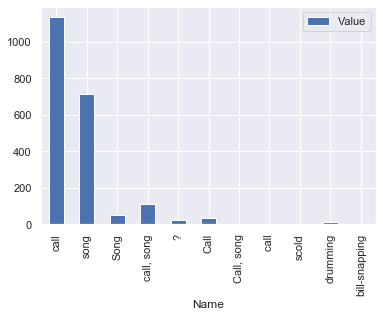

In [97]:
data1.plot(x="Name", y="Value", kind="bar")